## BREAST CANCER PREDICTION USING DIFFERENT ML MODELS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import time

## Exploratory analysis



In [2]:
DATA = pd.read_csv('DATA.csv', index_col=False)
DATA.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(DATA.shape)

(569, 33)


In [4]:
DATA.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## DATA VISUALISATION and PREPROCESSING

In [5]:
DATA['diagnosis'] = DATA['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
DATA = DATA.set_index('id')
del DATA['Unnamed: 32']

In [6]:
print(DATA.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


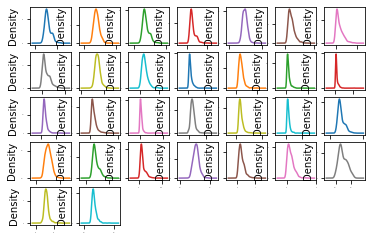

In [7]:
DATA.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

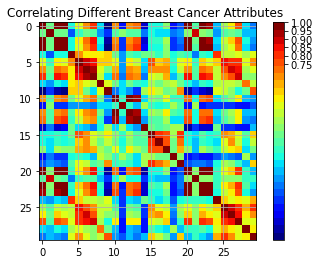

In [8]:
from matplotlib import cm as cm

fig = plt.figure()
Axis1 = fig.add_subplot(111)
Cmap = cm.get_cmap('jet', 30)
cax = Axis1.imshow(DATA.corr(), interpolation="none", cmap=Cmap)
Axis1.grid(True)
plt.title('Correlating Different Breast Cancer Attributes ')
fig.colorbar(cax, ticks=[0.75,0.8,0.85,0.90,0.95,1])
plt.show()

We'll split the data into Training and Test data sets. From which We will use 20% of the data as test set and remaing will be the Training set.

In [9]:
Y = DATA['diagnosis'].values
X = DATA.drop('diagnosis', axis=1).values
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [10]:
Training_X,Testing_X,Training_Y,Testing_Y = train_test_split(X,Y,test_size = 0.20, random_state=21)

## Baseline Testing Of Algorithms

From the provided dataset, we will analyze and build a model which predict if a given set of symptoms lead to breast cancer. Since This is a binary classification problem, so we will be using some non-linear algorithms, namely: "Classification and Regression Trees (CART)", "Linear Support Vector Machines (SVM)", "Gaussian Naive Bayes (NB)" and "k-Nearest Neighbors (KNN)".
For making our model easier for Testing and Training We will use 10-fold cross-validation for each test cases.



In [11]:
Model_List = []
Model_List.append(('CART', DecisionTreeClassifier()))
Model_List.append(('SVM', SVC())) 
Model_List.append(('NB', GaussianNB()))
Model_List.append(('KNN', KNeighborsClassifier()))

In [12]:
foldings = 10
ans=[]
Model_Name=[]

for name, model in Model_List:
    Kfolding = KFold(n_splits=foldings, shuffle= True, random_state=123)
    Start = time.time()
    CV_Ans = cross_val_score(model, Training_X, Training_Y, cv=Kfolding, scoring='accuracy')
    End = time.time()
    ans.append(CV_Ans)
    Model_Name.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, CV_Ans.mean(), CV_Ans.std(), End-Start))

CART: 0.931884 (0.032922) (run time: 0.214357)
SVM: 0.916329 (0.035471) (run time: 0.211796)
NB: 0.940531 (0.031603) (run time: 0.085656)
KNN: 0.922947 (0.038805) (run time: 2.194369)


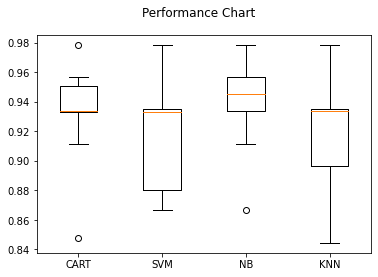

In [13]:
Figure = plt.figure()
Figure.suptitle('Performance Chart')
Axis = Figure.add_subplot(111)
plt.boxplot(ans)
Axis.set_xticklabels(Model_Name)
plt.show()

Here all the ML algorithms like GaussianNB, KNN and CART performed very well and provides a fair accuracy for the given Winconsin dataset (all above 92% mean accuracy). But the performance of Support Vector Machine is very bad. However, by standardizing the input dataset, we will be able to improve its performance.  


## Evaluation of algorithm on Standardised Data



In [14]:
import warnings

# Standardize the dataset
Pipelining=[]

Pipelining.append(('Standardize_CART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
Pipelining.append(('Standardize_SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
Pipelining.append(('Standardize_NB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
Pipelining.append(('Standardize_KNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Kfolding = KFold(n_splits=foldings, shuffle= True,random_state=123)
    for name, model in Pipelining:
        Start = time.time()
        CV_Ans = cross_val_score(model, Training_X, Training_Y, cv=Kfolding, scoring='accuracy')
        End = time.time()
        results.append(CV_Ans)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, CV_Ans.mean(), CV_Ans.std(), End-Start))

Standardize_CART: 0.938406 (0.033688) (run time: 0.180570)
Standardize_SVM: 0.966957 (0.029910) (run time: 0.171470)
Standardize_NB: 0.929565 (0.038096) (run time: 0.055216)
Standardize_KNN: 0.949469 (0.027808) (run time: 2.293252)


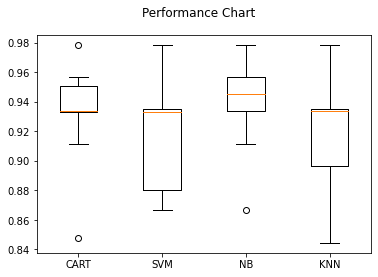

In [15]:
Figure = plt.figure()
Figure.suptitle('Performance Chart')
Axis = Figure.add_subplot(111)
plt.boxplot(ans)
Axis.set_xticklabels(Model_Name)
plt.show()

## Application of KNN on dataset

Applying KNN Algorithm on the provided Wisconsin dataset.

In [16]:
KNN_algo= KNeighborsClassifier(n_neighbors=5, weights = 'distance')
KNN_algo.fit(Training_X,Training_Y)
Y_Prediction =KNN_algo.predict(Testing_X)
Y_Prediction

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0',
       '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype=object)

In [17]:
ACC_KNN= print("Accuracy Of KNN Algorithm %f" % accuracy_score(Testing_Y, Y_Prediction))
print('-----'*10)
print(classification_report(Testing_Y, Y_Prediction))

Accuracy Of KNN Algorithm 0.921053
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.92      0.85      0.88        39

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [18]:
print(confusion_matrix(Testing_Y, Y_Prediction))

[[72  3]
 [ 6 33]]


<AxesSubplot:>

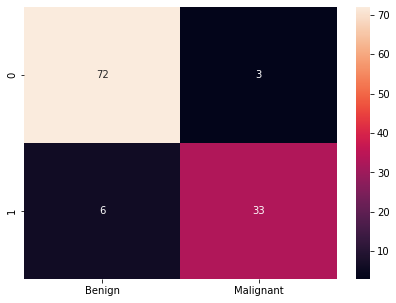

In [19]:
cm = confusion_matrix(Testing_Y, Y_Prediction )
Df_cm = pd.DataFrame(cm,index =[k for k in [0,1]],columns= [k for k in ['Benign', 'Malignant']] ) 
plt.figure(figsize=(7,5))
sns.heatmap(Df_cm,annot=True)

## Application of GausianNB on dataset 

In [20]:
clf = GaussianNB()
clf.fit(Training_X, Training_Y.ravel())
# Make predictions
Y_pred = clf.predict(Testing_X)
clf.classes_

array(['0', '1'], dtype='<U1')

In [21]:
cm = confusion_matrix(Y, clf.predict(X))
cm  
DATA["diagnosis"].unique()

array(['1', '0'], dtype=object)

In [22]:
Kfolding = KFold(5)  
print (cross_val_score (clf, X , Y.ravel() , cv=Kfolding, n_jobs = 1))

[0.87719298 0.92105263 0.95614035 0.97368421 0.95575221]


In [23]:
DF_ = DATA[DATA.index>113]
DF_.reset_index(drop=True, inplace=True)
DF_

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
X =DF_.drop(['diagnosis'] , axis = 1)
Y =DF_['diagnosis'].values.reshape(-1, 1) #Target variable
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
Training_X,Testing_X,Training_Y,Testing_Y = train_test_split(X,Y,test_size = 0.20, random_state=21)
print("x_train", Training_X.shape)
print("x_test", Testing_X.shape)
print("y_train", Training_Y.shape)
print("y_test", Testing_Y.shape)

x_train (455, 30)
x_test (114, 30)
y_train (455, 1)
y_test (114, 1)


In [26]:
clf = GaussianNB()
clf.fit(Training_X, Training_Y.ravel())
X_Prediction = clf.predict(Testing_X)
Y_Prediction = clf.predict(Testing_X) 
X_Prediction,Y_Prediction

(array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
        '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
        '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1',
        '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0',
        '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
        '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
        '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype='<U1'),
 array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
        '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
        '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '1', '1', '1', '1', '0', '0'

In [27]:
clf.classes_
cm = confusion_matrix(Y, clf.predict(X))
print(cm)

[[346  11]
 [ 24 188]]


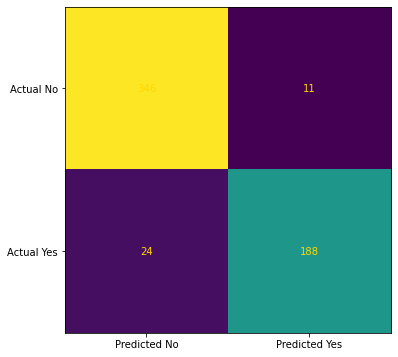

In [28]:
Figure, Axis = plt.subplots(figsize=(6, 6))
Axis.imshow(cm)
Axis.grid(False)
Axis.xaxis.set(ticks=(0, 1), ticklabels=("Predicted No", "Predicted Yes"))
Axis.yaxis.set(ticks=(0, 1), ticklabels=("Actual No", "Actual Yes"))
Axis.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        Axis.text(j, i, cm[i, j], ha="center", va="center", color="gold")
plt.show()

In [29]:
ACC_GausianNB= print("Accuracy Of GausianNB Algorithm %f" % accuracy_score(Testing_Y, Y_Prediction))
print('-----'*10)
print(classification_report(Testing_Y, Y_Prediction))

Accuracy Of GausianNB Algorithm 0.921053
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.92      0.85      0.88        39

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



## APPLICATION OF ANN ON DATASET

In [30]:
ANN_Model1 = Sequential()

In [31]:
ANN_Model1.add(Dense(units = 7, activation = 'relu',input_dim=30))

# Second Hidden Layer

ANN_Model1.add(Dense(units = 7, activation = 'relu'))

# Third Hidden Layer

ANN_Model1.add(Dense(units = 7, activation = 'relu'))

ANN_Model1.add(Dense(units = 7, activation = 'relu'))
# Adding the output layer

ANN_Model1.add(Dense(units = 1, activation = 'sigmoid'))

In [32]:
print(ANN_Model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 217       
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# Converting diagnosis value from string to float
Y = DATA['diagnosis'].values
X = DATA.drop('diagnosis', axis=1).values
Y = np.asarray(Y).astype("float64")
Training_X,Testing_X,Training_Y,Testing_Y = train_test_split(X,Y,test_size = 0.20, random_state=21)

In [34]:
ANN_Model1.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy' , metrics = ['accuracy'] )
# Training the ANN on the training set
ANN_Model1.fit(Training_X,Training_Y, batch_size = 16, epochs = 100)

Epoch 1/100
29/29 [==============================] - 2s 4ms/step - loss: 0.7148 - accuracy: 0.5670
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.6220
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.6176
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.6066
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.6176
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.6198
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.6198
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.6198
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.6198
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.6198
Epoch 11/

29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 84/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 85/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 86/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 87/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 88/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 89/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 90/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 91/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 92/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6198
Epoch 93/100


In [35]:
prediction = ANN_Model1.predict(Testing_X)
prediction = (1 if Y> 0.5 else 0 for Y in prediction)
prediction

4/4 [==============================] - 0s 11ms/step


<generator object <genexpr> at 0x0000018557E86F20>

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Testing_Y.astype(str), Y_Prediction.astype(str))
print("Confusion Matrix")
print(cm)
print()

Confusion Matrix
[[ 0  0  0  0]
 [72  0  3  0]
 [ 0  0  0  0]
 [ 6  0 33  0]]



In [37]:
ACC_ANN= print("Accuracy Of ANN Algorithm %f" % accuracy_score(Testing_Y.astype(float), Y_Prediction.astype(float)))
print('-----'*10)
print(classification_report(Testing_Y.astype(float), Y_Prediction.astype(float) ))

Accuracy Of ANN Algorithm 0.921053
--------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        75
         1.0       0.92      0.85      0.88        39

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



## ALGORITHM TUNNING

In [38]:
# Tunning Of Algorithm using Hyperparameters
Scaler = StandardScaler().fit(Training_X)
ReScaledX = Scaler.transform(Training_X)
C_Values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
Kernel_Values = ['linear', 'poly', 'rbf', 'sigmoid']
Param_Grid = dict(C=C_Values, kernel=Kernel_Values)
Model_Name = SVC()
Kfolding = KFold(n_splits=foldings,shuffle= True, random_state=21)
Grids = GridSearchCV(estimator=Model_Name , param_grid=Param_Grid, scoring='accuracy', cv=Kfolding)
Grid_Results = Grids.fit(ReScaledX, Training_Y.ravel())
print("Best: %f using %s" % (Grid_Results.best_score_, Grid_Results.best_params_))
Mean_val = Grid_Results.cv_results_['mean_test_score']
Std_val = Grid_Results.cv_results_['std_test_score']
params = Grid_Results.cv_results_['params']
for mean, stdev, param in zip(Mean_val, Std_val, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969130 using {'C': 1.5, 'kernel': 'rbf'}
0.966908 (0.022890) with: {'C': 0.1, 'kernel': 'linear'}
0.828502 (0.050827) with: {'C': 0.1, 'kernel': 'poly'}
0.942850 (0.032841) with: {'C': 0.1, 'kernel': 'rbf'}
0.953768 (0.028890) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.964686 (0.017960) with: {'C': 0.3, 'kernel': 'linear'}
0.865845 (0.032091) with: {'C': 0.3, 'kernel': 'poly'}
0.953816 (0.026855) with: {'C': 0.3, 'kernel': 'rbf'}
0.956039 (0.031363) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.962512 (0.017495) with: {'C': 0.5, 'kernel': 'linear'}
0.878986 (0.030482) with: {'C': 0.5, 'kernel': 'poly'}
0.962560 (0.026103) with: {'C': 0.5, 'kernel': 'rbf'}
0.953816 (0.033601) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.964686 (0.017960) with: {'C': 0.7, 'kernel': 'linear'}
0.890048 (0.031450) with: {'C': 0.7, 'kernel': 'poly'}
0.962609 (0.027882) with: {'C': 0.7, 'kernel': 'rbf'}
0.951546 (0.036945) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.964734 (0.017877) with: {'C': 0.9, 'kernel': 'linear'

## APPLICATION OF SVM ON DATASET 

In [39]:
# Prepare The Model_Name 
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Scaler = StandardScaler().fit(Training_X)
Training_X_scaled = Scaler.transform(Training_X)
Model_Name = SVC(C=2.0, kernel='rbf')
Start = time.time()
Model_Name.fit(Training_X_scaled,Training_Y.ravel())
End = time.time()
print( "Run Time: %f" % (End-Start))

Run Time: 0.011077


In [40]:
# Estimate Accuracy on Test Dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Testing_X_scaled = Scaler.transform(Testing_X)
Predictions = Model_Name.predict(Testing_X_scaled)

In [41]:
print(confusion_matrix(Testing_Y, Predictions))

[[74  1]
 [ 0 39]]


In [42]:
ACC_SVM= print("Accuracy score SVM %f" % accuracy_score(Testing_Y, Predictions))
print('-----'*10)
print(classification_report(Testing_Y, Predictions))

Accuracy score SVM 0.991228
--------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        75
         1.0       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

